In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
#  Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set path to the dataset
dataset_path = "/content/drive/MyDrive/dataset-resized"

In [ ]:

#  Image Settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=30
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
#  Build the CNN Model using EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(*IMG_SIZE, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1439s 22s/step - accuracy: 0.2043 - loss: 1.7775 - val_accuracy: 0.2346 - val_loss: 1.7266
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 600ms/step - accuracy: 0.2058 - loss: 1.7418 - val_accuracy: 0.1909 - val_loss: 1.7383
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 584ms/step - accuracy: 0.2231 - loss: 1.7403 - val_accuracy: 0.2346 - val_loss: 1.7327
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 592ms/step - accuracy: 0.2323 - loss: 1.7332 - val_accuracy: 0.2346 - val_loss: 1.7255
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 570ms/step - accuracy: 0.2217 - loss: 1.7298 - val_accuracy: 0.2346 - val_loss: 1.7259
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 580ms/step - accuracy: 0.2415 - loss: 1.7316 - val_accuracy: 0.2346 - val_loss: 1.7232
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 586ms/step - accuracy: 0.2097 - loss: 1.7348 - val_accuracy: 0.2346 - val_loss: 1.7255
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 607ms/step - accuracy: 0.2302 - loss: 1.7210 - val_accu

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 479ms/step - accuracy: 0.2308 - loss: 1.7324

 Final Validation Accuracy: 0.2346


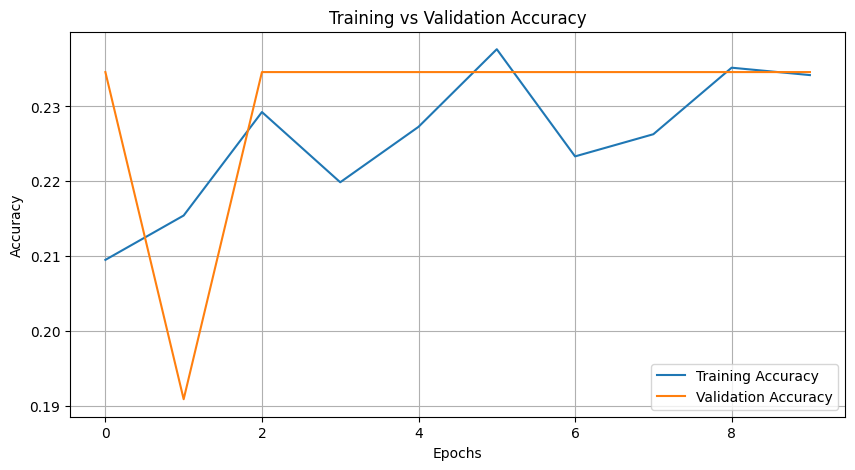

In [ ]:
#  Evaluate the Model
val_loss, val_acc = model.evaluate(val_gen)
print(f"\n Final Validation Accuracy: {val_acc:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()